# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

%matplotlib inline

#Print the 43 class label names
signname_map = np.genfromtxt('signnames.csv', skip_header=1, delimiter=',', usecols=(1,), unpack=True, dtype=str)



---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import os

# TODO: fill this in based on where you saved the training and testing data
training_file = os.path.join(os.getcwd(), 'train.p')
testing_file = os.path.join(os.getcwd(), 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print('X_train, y_train, X_test, y_test are extracted from pickles in the directory')

X_train, y_train, X_test, y_test are extracted from pickles in the directory


In [3]:
# List of traffic signs
list = [a for a in signname_map]
print('Total number of signs are %d' %(len(list)))
print(list)

Total number of signs are 43
['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles o

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### To start off let's do a basic data summary.

# TODO: number of training examples
# n_train = ...

# TODO: number of testing examples
# n_test = ...

# TODO: what's the shape of an image?
# image_shape = ..

# TODO: how many classes are in the dataset
# n_classes = ...

print("Number of training examples =", X_train.shape[0])
print("Number of testing examples =", X_test.shape[0])
print("Image data shape =", X_train.shape[1:3])
print("Number of classes =", len(np.unique(y_train)))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [5]:
def hist_def(data):
    pic = plt.hist(data, bins = range(len(np.unique(data))), histtype = 'bar')
    return pic

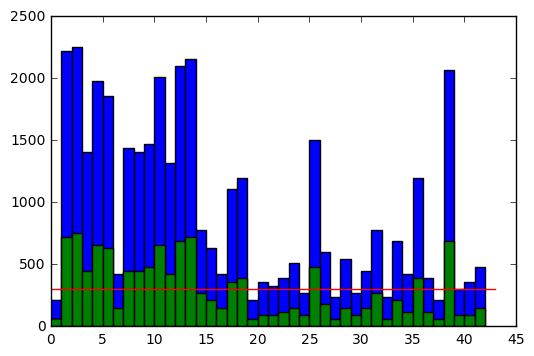

In [6]:
# histogram_train = plt.hist(y_train,bins = range(len(np.unique(y_train))))
histogram_train = hist_def(y_train)
# histogram_test = plt.hist(y_test, bins = range(len(np.unique(y_test))))
histogram_test = hist_def(y_test)
plt.plot((0,43),(300,300),'-',color = 'r')

plt.show()

<font color = 'red', size = 4>Just some considerations</font>

- Assumption, fewer total number of training images, more difficult image recognition.

In [7]:
L500 = [idx for idx, a in enumerate(histogram_train[0]) if a <300]
print("A number of small dataset less than 300 in traffic sign : %d" % (len(L500)))
[a for a in signname_map[L500]]

A number of small dataset less than 300 in traffic sign : 7


['Speed limit (20km/h)',
 'Dangerous curve to the left',
 'Road narrows on the right',
 'Pedestrians',
 'Bicycles crossing',
 'End of all speed and passing limits',
 'Go straight or left']

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39209, 32, 32, 3) (39209,)
(12630, 32, 32, 3) (12630,)


----
# Traffic sign visualization

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [9]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [10]:
#reading in an image
exp_list = [0,5000,10000,12000]

def img_test(test_list, a, b):
    i = 0 
    plt.figure(figsize = [15,15])
    
    
    for img in test_list:
        plt.subplot(a, b, i+1)
        plt.title(signname_map[y_train[img]])
        plt.imshow(X_train[img])
        i = i + 1
        plt.axis('off')
        
print('function for print sample images from a list')

function for print sample images from a list


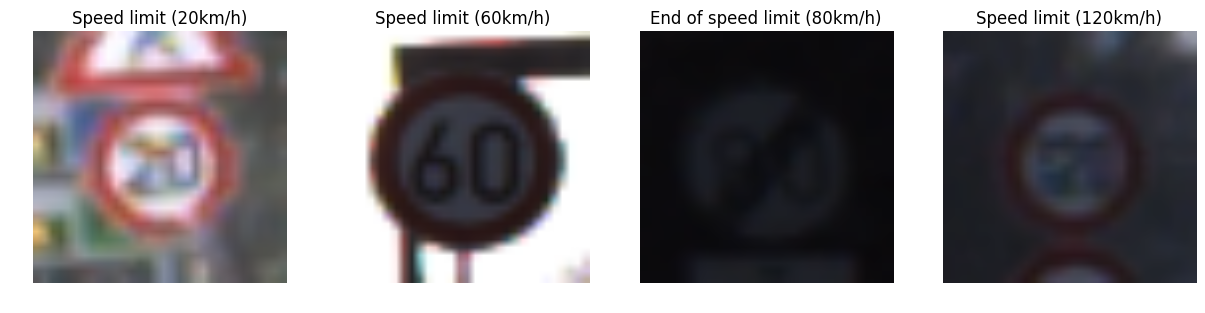

In [11]:
img_test(exp_list,1,4)

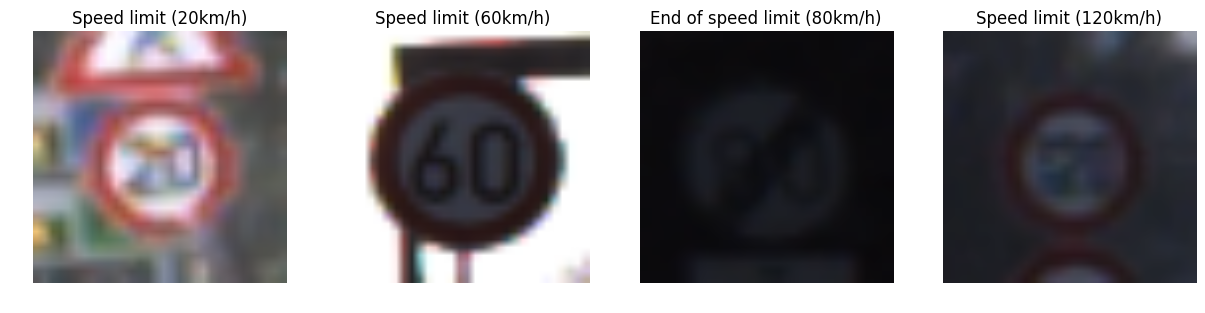

In [12]:
img_test(exp_list,1,4)

In [13]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

### Visualize german sign images

Visualize each 43 german sign images how do they look like along with the sign name

In [14]:
unique_label = pd.DataFrame(y_train, columns = ['label No'])
unique_label = unique_label.drop_duplicates()
print(unique_label.index)

Int64Index([    0,   210,  2430,  4680,  6090,  8070,  9930, 10350, 11790,
            13200, 14670, 16680, 18000, 20100, 22260, 23040, 23670, 24090,
            25200, 26400, 26610, 26970, 27300, 27690, 28200, 28470, 29970,
            30570, 30810, 31350, 31620, 32070, 32850, 33090, 33779, 34199,
            35399, 35789, 35999, 38069, 38369, 38729, 38969],
           dtype='int64')


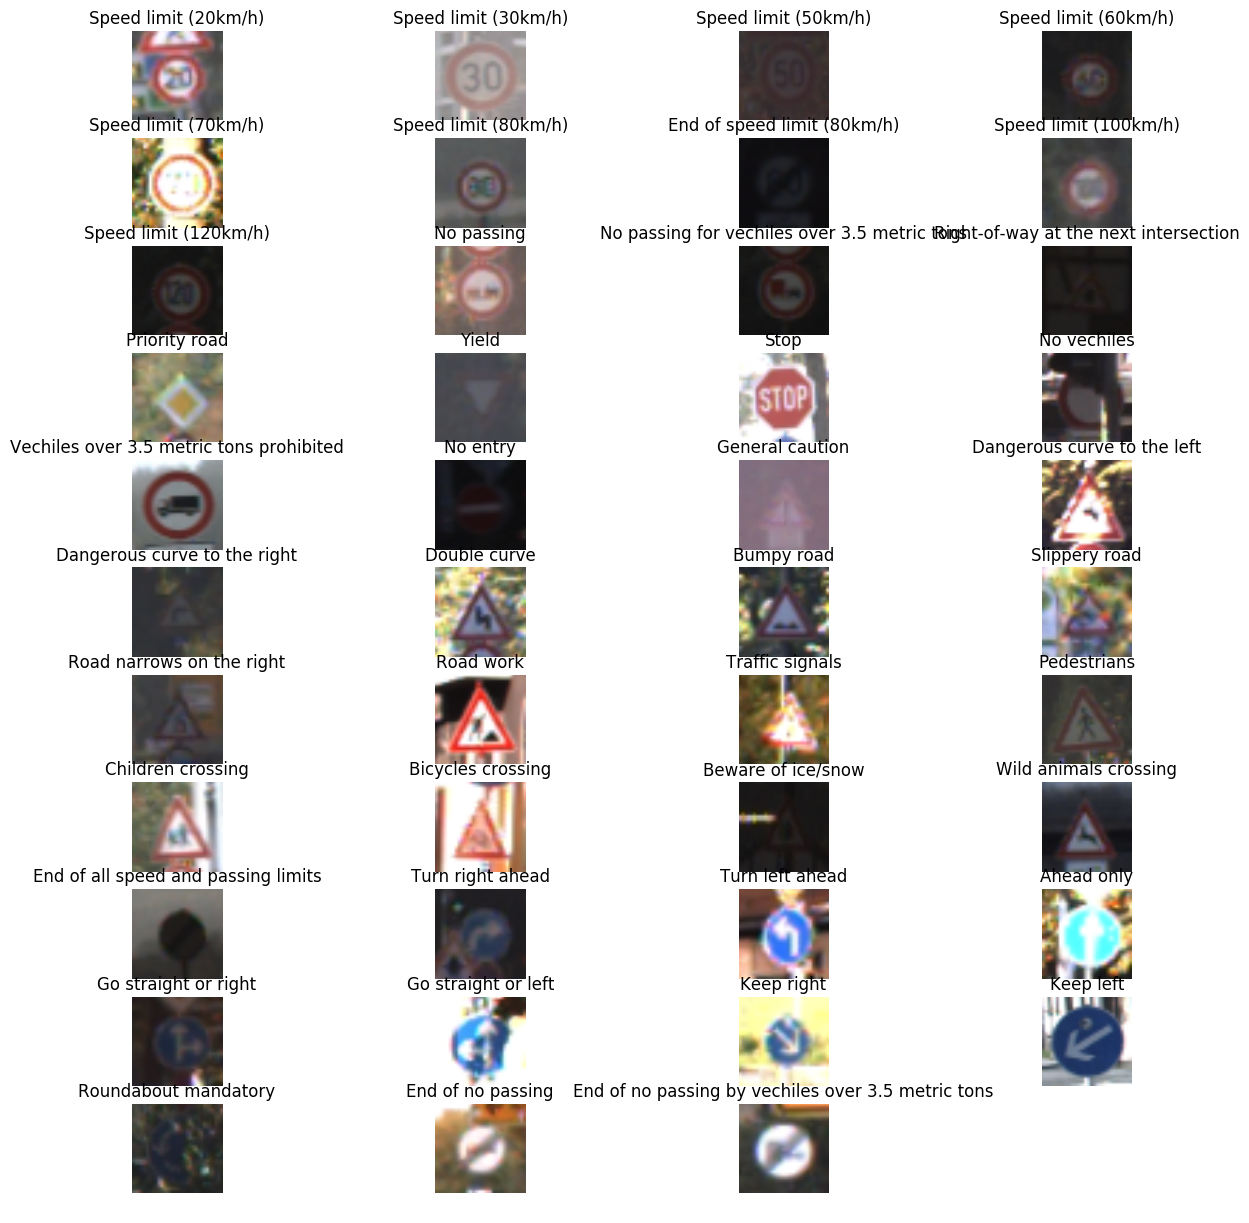

In [15]:
img_test(unique_label.index,11,4)

<font color = 'red', size = 4>Just some considerations</font>

- Some of signs too dark to read, it might be helpful to change the color brighter or something like that
- In a first few submission, I processed with gray color for better process speed. but it might be a good idea starting with RGB color

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [16]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [17]:
# Preprocess 1. down sampled or up sampled to 32 x 32
print("Function for transferring matrix to image")
print(X_train.shape, X_test.shape)

# Even though they already fit in the size, I just tried to make it different size for practice

# Firstly, changed the matrix to image, just some of them
from PIL import Image

def mat_to_img(matrix, index):
    im = Image.fromarray(matrix)
    im.save(str(index) + '.jpeg')

Function for transferring matrix to image
(39209, 32, 32, 3) (12630, 32, 32, 3)


In [18]:
X_train[:5].shape
X_test[:5].shape

for idx, mat in enumerate(X_train[:5]):
    mat_to_img(mat, idx)

In [19]:
new_width = 32
new_height = 32

print("Doesn't need to use here but just tried for resizing the image.\n They are already resized to 32x32 \
but might be needed later")

def img_resize(image, index):
    img = Image.open(str(index) + '.jepg')
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(str(index) + '_resize.jepg')

Doesn't need to use here but just tried for resizing the image.
 They are already resized to 32x32 but might be needed later


In [20]:
# Preprocess 2. preprocessing image to grayscale
print("Function for RGB to grayscale")
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
#     change to grayscale
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Function for RGB to grayscale


In [21]:
# Preprocess 3. Preprocessing image MinMax standardization
print("Function for minmax data standardization")
from sklearn.preprocessing import MinMaxScaler

is_features_scaled = False
is_labels_encod = False

def scaled(list):
    gray_stack = []

    for idx in list:
        gray_img = grayscale(idx)
        gray_img_scale = MinMaxScaler().fit_transform(gray_img)
        gray_stack.append(gray_img_scale)
    return gray_stack

Function for minmax data standardization


In [22]:
def img_test(test_list, a, b):
    i = 0 
    plt.figure(figsize = [15,15])
    
    
    for img in test_list:
        plt.subplot(a, b, i+1)
        plt.title(signname_map[y_train[img]])
        plt.imshow(X_train_scaled[img])
        i = i + 1
        plt.axis('off')
        
print('function for print preprocessed images from a list')

function for print preprocessed images from a list


In [23]:
if not is_features_scaled:
    X_train_scaled = np.stack(scaled(X_train), axis = 0)
    X_test_scaled = np.stack(scaled(X_test), axis = 0)
    is_features_scaled = False

/Users/JAY/anaconda/envs/yourNewEnvironment/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


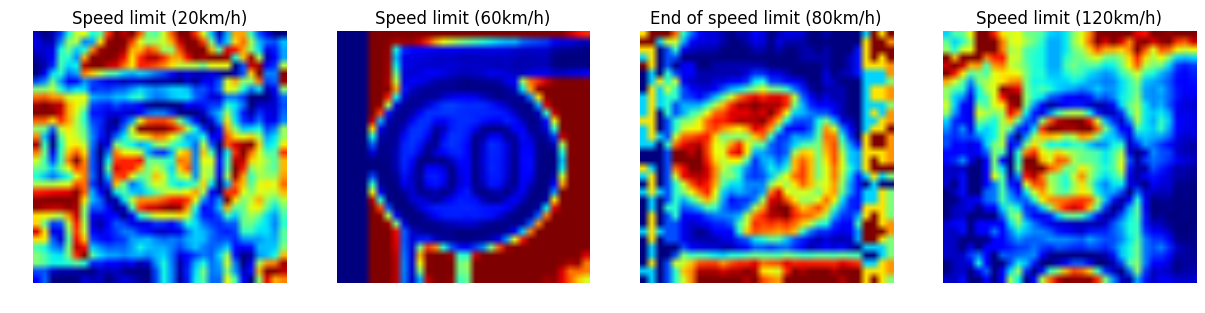

In [24]:
img_test(exp_list,1,4)

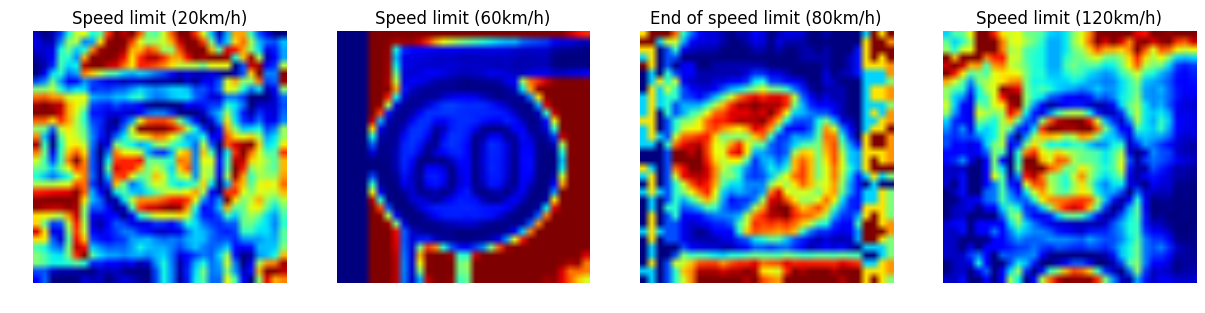

In [25]:
img_test(exp_list,1,4)

In [26]:
print(X_train_scaled[:1], X_test_scaled[:1])
print(y_train[:1], y_test[:1])
print('features scaled 0 to 1')

[[[ 0.05263158  0.          0.04       ...,  0.09375     0.          0.        ]
  [ 0.09649123  0.04672897  0.05       ...,  0.21875     0.2         0.31428571]
  [ 0.07017544  0.07476636  0.09       ...,  0.09375     0.15        0.28571429]
  ..., 
  [ 0.5         0.44859813  0.37       ...,  0.75        0.775       0.97142857]
  [ 0.20175439  0.20560748  0.07       ...,  1.          1.          0.94285714]
  [ 0.11403509  0.22429907  0.         ...,  0.90625     0.725       0.77142857]]] [[[ 0.71428571  0.5         0.77777778 ...,  0.06060606  0.          0.        ]
  [ 1.          0.75        1.         ...,  0.93939394  0.84615385
    0.81818182]
  [ 0.85714286  1.          0.88888889 ...,  1.          1.          0.93181818]
  ..., 
  [ 0.28571429  0.          0.33333333 ...,  0.75757576  0.65384615
    0.81818182]
  [ 0.14285714  0.125       0.         ...,  0.6969697   0.65384615
    0.79545455]
  [ 0.          0.          0.33333333 ...,  0.75757576  0.69230769
    0.81818182

In [27]:
if not is_labels_encod:
    # Turn labels into numbers and apply One-Hot Encoding
    encoder = LabelBinarizer()
    encoder.fit(y_train)
    train_labels = encoder.transform(y_train)
    test_labels = encoder.transform(y_test)

    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    train_labels = train_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    is_labels_encod = True

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [28]:
print('Sample labels to test one-hot encoded\n')

print(train_labels[:1], test_labels[:1])
print(np.where(train_labels == 1)[1])

Sample labels to test one-hot encoded

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]] [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]
[ 0  0  0 ..., 42 42 42]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
- RGB color to Gray scaled because it could reduece the number of features so that could make the process faster. It could be helpful to use color preprocess for better accuracy. 
- Also normalize the images to converge easily.
- One hot encoding transforms categorical features to binary matrix so that could make features be ordinal

In [29]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
- the training dataset splitted by training[80%] and validation[20%] (originally splitted by 7:3, but they already have test dataset so fewer validation dataset needed but it seems like a little, a little better or similar with the 8:2 as I see the result after all the test below)
- testing dataset for test.


In [30]:
print('Split train data to check a validation')

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_scaled,
    train_labels,
    test_size=0.2,
    random_state=832289)

print('Training features and labels randomized and split.')

Split train data to check a validation
Training features and labels randomized and split.


In [31]:
print('Test validation splited dataset\n')
print(train_features.shape, valid_features.shape, train_labels.shape, valid_labels.shape, '\n\n')
# print(train_features[:2], valid_features[:2], train_labels[:2], valid_labels[:2])

Test validation splited dataset

(31367, 32, 32) (7842, 32, 32) (31367, 43) (7842, 43) 




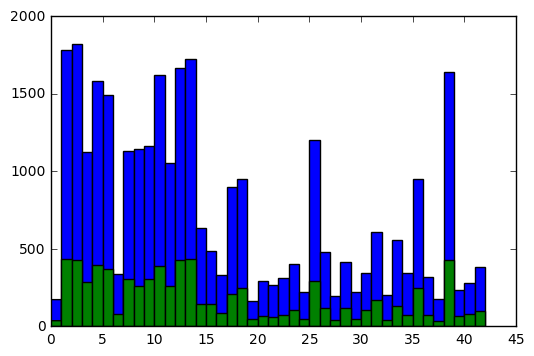

In [32]:
hist_train = hist_def(np.where(train_labels==1)[1])
# hist_test = hist_def(np.where(test_labels==1)[1])
hist_val = hist_def(np.where(valid_labels==1)[1])
plt.show()

In [33]:
# Save the data for easy access
pickle_file = 'notMNIST.pickle'
# pickle_file = False

if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('notMNIST.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': X_test_scaled,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


----
<font color = 'red', size = 10> COMEBACK POINT</font>


In [34]:
# Checkpoint
# All your progress is now saved to the pickle file. 
# If you need to leave and comeback to this lab, 
# you no longer have to start from the beginning. Just run the code block below and 
# it will load all the data and modules required to proceed.

In [35]:
%matplotlib inline

# Load the modules
import pickle
import math

import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data

pickle_file = os.getcwd() + '/notMNIST.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


In [36]:
print('test well loaded features\n\n')

print(train_features.shape, valid_features.shape, test_features.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

test well loaded features


(31367, 32, 32) (7842, 32, 32) (12630, 32, 32)
(31367, 43) (7842, 43) (12630, 43)


In [37]:
image_size = 32
num_labels = 43
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
#   labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_features, train_labels)
valid_dataset, valid_labels = reformat(valid_features, valid_labels)
test_dataset, test_labels = reformat(test_features, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32, 1) (31367, 43)
Validation set (7842, 32, 32, 1) (7842, 43)
Test set (12630, 32, 32, 1) (12630, 43)


In [38]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [39]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [40]:
from tensorflow.contrib.layers import flatten

batch_size = 256
patch_size = {
    'p1' : 5,
    'p2' : 5
#     'p3' : 4,
#     'p4' : 4
}
# num_hidden = 64

layer_depth = {
    'layer_1':6,
    'layer_2':16,
    'con_1':120,
    'con_2':43
}


graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # layer1_ Input 32 x 32 image data, ouput 32 x 32 x 6, with pooling 16 x 16 x 6
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p1'], patch_size['p1'], num_channels, layer_depth['layer_1']], stddev=0.1)) #[size, size, input, output]
  layer1_biases = tf.Variable(tf.zeros(layer_depth['layer_1'])) #tf.zeros = no biases
    
  # layer2_ Input 16 x 16 x 6, output 16 x 16 x 8, with pooling 8 x 8 x 8     
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p2'], patch_size['p2'], layer_depth['layer_1'], layer_depth['layer_2']], stddev=0.1)) #[size, size, input, output]
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[layer_depth['layer_2']])) # tf.ones biases for shape, depth

  # layer3_ Input 8 x 8 x 8, output 8 x 8 x 12, with pooling 4 x 4 x 12 
#   layer3_weights = tf.Variable(tf.truncated_normal(
#       [patch_size['p3'], patch_size['p3'], layer_depth['layer_2'], layer_depth['layer_3']], stddev=0.1)) #[size, size, input, output]
#   layer3_biases = tf.Variable(tf.constant(1.0, shape=[layer_depth['layer_3']])) # tf.ones biases for shape, depth
  

  layer3_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p2'] * patch_size['p2'] * layer_depth['layer_2'], layer_depth['con_1']], stddev=0.1)) #
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[layer_depth['con_1']]))


  layer4_weights = tf.Variable(tf.truncated_normal(
      [layer_depth['con_1'], num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer1_biases)
#     print(hidden)
    pooling = tf.nn.max_pool(hidden, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
#     print(pooling)
#     print("1",hidden)
    conv = tf.nn.conv2d(pooling, layer2_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer2_biases)
    pooling = tf.nn.max_pool(hidden, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
#     print(hidden)
#     print(pooling)
    
#     print(flatten(pooling))
#     shape = pooling.get_shape().as_list()
    shape = flatten(pooling)
#     print(shape)
#     print(shape[0])
#     reshape = tf.reshape(shape, [shape[0], shape[1]])
    
    hidden = tf.nn.relu(tf.matmul(shape, layer3_weights) + layer3_biases)
#     print(hidden)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
#   print(tf_test_dataset)
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 
- Input 32x32x3 images 27k images
- Preprocessing gray image, standardization
- Convolution1 28x28x6, stride 1
- RELU
- Pooling 14x14x6 stride 2
- Convolution2 10x10x16, stride 1
- RELU
- Pooling 5x5x16, stride 2
- Fully connected1 120
- Fully connected2 43
- Softmax

---
**Update**
Thank you for your suggestion for tensorboard. I will study that one and implement next submission!
It takes time...

In [42]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [43]:
def label_pred(pred):
    # print(signname_map)
    # Use the mapping array to print the SignName.
    # print(test_labels.shape)
    # print(test_labels)
    predictions = np.unique(pred)
    # print(predictions)
    predict_signNames = []
    for id in pred:
        for idx, value in enumerate(id):
            if value == 1:
                predict_signNames.append(signname_map[int(idx)])
    return predict_signNames

Initialized


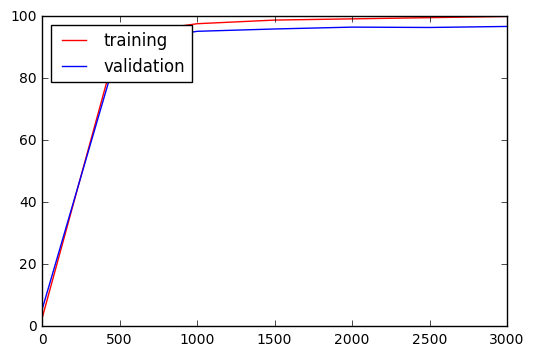

(array([   39,    44,    45, ..., 12616, 12627, 12628]),)
Train accuracy: 100.0%
Validation accuracy: 96.8%
Test accuracy: 89.3%


In [44]:
num_steps = 3001
x = []
y = []
z = []

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      x.append(step)
      y.append(accuracy(predictions, batch_labels))
      z.append(accuracy(valid_prediction.eval(), valid_labels))
    
#       print('Minibatch loss at step %d: %f' % (step, l))
#       print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
#       print('Validation accuracy: %.1f%%' % accuracy(
#         valid_prediction.eval(), valid_labels))
    
    
  plt.plot(x, y, color = 'r', label = 'training')
  plt.plot(x, z, color = 'b', label = 'validation')
  plt.legend(loc = 2)    
  plt.show()
  print(np.where(np.argmax(test_prediction.eval(),1) != np.argmax(test_labels,1)))
#   label_pred(test_prediction.eval())
#   print(test_prediction.eval())
  print('Train accuracy: %.1f%%' % accuracy(predictions, batch_labels))
  print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
#   print(np.argmax(test_prediction.eval(), 1)[:5])
#   print(np.argmax(test_labels, 1)[:5])
#   print([signname_map[a] for a in np.argmax(test_prediction.eval(), 1)[:5]])

In [45]:
# file_writer = tf.summary.FileWriter('/path/to/logs', sess.graph)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
right below the model was chosen for the training

- 4 hidden layers with RELU, Pooling, Fully connected
- batch size = 256 : compared with the sizes, 24, 128, and 256 and not that large difference between 256 and 128
- optimizer = Gradient descent optimizer, 
- epochs = 3001 : compared with the epochs 1001, and 3001 and got a better result for 3001 size
- learning rate = 0.1 : compared with the learning rate 0.1 and 0.01 and get a better result for 0.1

As shown below all the test result

<font color = 'red', size = 5>Validation 30%</font>

##### Learning Rate. 0.01, Steps.3001, Batch 128
- Train accuracy: 92.2%, Validation accuracy: 89.8%, **Test accuracy: 82.0%**

##### Learning Rate. 0.1, Steps.3001, Batch 128
- Train accuracy: 100.0%, Validation accuracy: 97.3%, **Test accuracy: 89.5%**

##### Learning Rate. 0.1, Steps.1001, Batch 128
- Train accuracy: 92.2%, Validation accuracy: 89.0%, **Test accuracy: 80.6%**

##### Learning Rate 0.1, Steps 3001, Batch 256

- Train accuracy: 100.0%, Validation accuracy: 97.1%, **Test accuracy: 89.6% [BEST RESULT]**

#### Learning Rate 0.1, Steps 3001, Batch 128
- Train accuracy: 100.0%, Validation accuracy: 97.3%, **Test accuracy: 89.5%**

#### Learning Rate 0.1, Steps 3001, Batch 24
- Train accuracy: 91.7%, Validation accuracy: 93.6%, **Test accuracy: 86.5%**


<font color = 'red', size =5>Validation 20%</font>

#### Learning Rate 0.1, Steps 3001, Batch 256
- Train accuracy: 100.0%, Validation accuracy: 96.7%, **Test accuracy: 88.3%**






### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 
- Please discuss how did you choose the optimzer. (Missed Answer)

It seems like GradientDescentOptimizer is basic optimizer to start Machine Learning.
Plan to apply adam optimizer later. but If there should be a reason for why I use the optimizer. I am not sure what benefit only for gradientdescent but the others, such as Adadeltaoptimizer, Momentumoptimizer, Adamoptimizer. 

- Please discuss how did you tell a convolutional layer is well suited for this problem. (Missed Answer)

As I understood, convolutional network could make a image deeper and could make the image interpreted as multiple images along with the parameters, patchs depend on how to set them up. So, it could interpret the image well with fewer images compared to other deep network. I think I need to study this topic more. 

- Please discuss how did you tune the hyperparameter. (Missed Answer)

Tried to change the parameters. make them bigger or smaller such as Learning rate, Batch, Patch, and epochs as it ran.
Above the test result shown how I tuned the parameters

- Please discuss how did you train your model. (Missed Answer)

Entire dataset splitted by three set of data, which are training data, validation data, and test data.
The model was trained with multiple of Convolutional network, RELU, and Pooling. 
after then it was optimized with gradientdescent optimizer to find proper weights and biases.


- Please discuss how would you evaluate the model. (Missed Answer)

After all the process, which is training the dataset and testing test dataset. 
The classifier applied to the test images from any pictures of a street. 
It should predict the test images well if the classifier correctly optimized for the image recognition.
Below explained how I applied new images to the classifier which I trained with the original dataset.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [47]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
# import PIL
from PIL import Image

from scipy import misc

In [48]:
# Preprocess 2. preprocessing image to grayscale

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
#     change to grayscale
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [49]:
dir = os.path.join(os.getcwd() + '/TestImage')

In [50]:
# imgs = []'
i = 0
origin = np.full((32,32),0)
# origin = np.array([origin])
print(origin.shape)
# basewidth = 32
# print(origin.shape)
for a in os.listdir(dir):
    
    try:
#         print(a)
        face = Image.open(dir + '/' + a).convert('L')
#         face = face.convert('L')
        face = face.resize((32,32), Image.ANTIALIAS)
        data= np.array(face, dtype = np.float32)
#         print(data.shape)
        origin = np.vstack((origin, data))
#         data = face.getdata()
        
#         print(np.array(face))
#         face.show()
#         face = face.getdata()
#         face = np.array(face).reshape((32,32))
#         origin = np.vstack((origin, np.array([face])))
        
    except:
        print("PASS")
    
origin = origin.reshape(-1,32,32,1)
origin = origin.astype(np.float32)

(32, 32)
PASS
PASS


/Users/JAY/anaconda/envs/yourNewEnvironment/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((32, 32), 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [52]:
print('function for print sample images from a list')
test_list_ = ['No parking[NOL]', 'No entry', 'Slippery', 'No truck[NOL]', 'Divided road[NOL]', 'Stop', 'Speed 40mph[NOL]','Human alert',
            'right road', 'Yield', 'Yield']
test_no = [100, 17, 23, 100, 100, 14, 100 , 27, 36, 13, 13]


# img_test_3(range(len(origin)), len(origin)/2, len(origin)/2)

TestSign = pd.DataFrame({'Sign Name' : test_list_, 'Sign No' : test_no})
# print(TestSign)


function for print sample images from a list


In [53]:
def img_test_3(test_list, label):
    i = 0 
    plt.figure(figsize = [15,15])

    for idx, img in enumerate(test_list):
        plt.subplot(len(test_list)/2,len(test_list)/2,i+1)
        plt.title(label[i])
        plt.imshow(img)
        plt.axis('off')
        i = i + 1

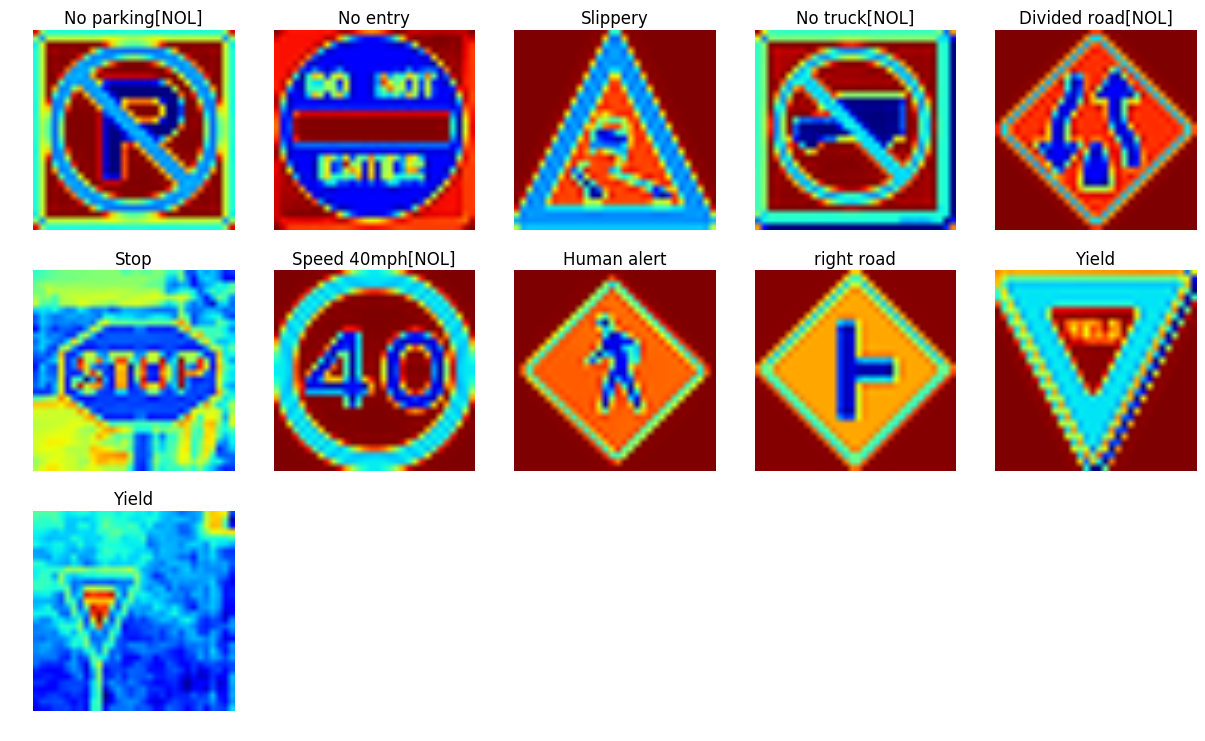

In [54]:
img_test_3(origin[1:,:,:,0], test_list_)

Above shows list of test items and some of them are not on the list on 43 traffic sign, which presnted "[NOL]" end of sign name
#### NOL = Not On the List

In [55]:
from tensorflow.contrib.layers import flatten

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(origin[1:])
    
  # Variables.
  # layer1_ Input 32 x 32 image data, ouput 32 x 32 x 6, with pooling 16 x 16 x 6
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p1'], patch_size['p1'], num_channels, layer_depth['layer_1']], stddev=0.1)) #[size, size, input, output]
  layer1_biases = tf.Variable(tf.zeros(layer_depth['layer_1'])) #tf.zeros = no biases
    
  # layer2_ Input 16 x 16 x 6, output 16 x 16 x 8, with pooling 8 x 8 x 8     
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p2'], patch_size['p2'], layer_depth['layer_1'], layer_depth['layer_2']], stddev=0.1)) #[size, size, input, output]
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[layer_depth['layer_2']])) # tf.ones biases for shape, depth

  layer3_weights = tf.Variable(tf.truncated_normal(
      [patch_size['p2'] * patch_size['p2'] * layer_depth['layer_2'], layer_depth['con_1']], stddev=0.1)) #
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[layer_depth['con_1']]))

  layer4_weights = tf.Variable(tf.truncated_normal(
      [layer_depth['con_1'], num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer1_biases)
    pooling = tf.nn.max_pool(hidden, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    conv = tf.nn.conv2d(pooling, layer2_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer2_biases)
    pooling = tf.nn.max_pool(hidden, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    shape = flatten(pooling)
    hidden = tf.nn.relu(tf.matmul(shape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
#   print(tf_test_dataset)
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [56]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
  print('Train accuracy: %.1f%%' % accuracy(predictions, batch_labels))
  print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
#   print(np.argmax(test_prediction.eval(),1))
  print('Test accuracy: %.1f%%' % (100.0 * np.sum(np.argmax(test_prediction.eval(), 1) == test_no)
          / test_prediction.eval().shape[0]))

  print(np.argmax(test_prediction.eval(), 1))
  test_pred = [signname_map[a] for a in np.argmax(test_prediction.eval(), 1)]

Initialized
Train accuracy: 100.0%
Validation accuracy: 96.9%
Test accuracy: 36.4%
[ 7 17 23 12 34 14 12  1 40 13  1]


### Train and validation accuracy is pretty high around 99.6% and 96.4% but Test accuracy 9.1%, which means only one image of 11 correctly recognized even though 4 of test images not on the traffic image list. 
### 1/7 = 14%, still not very good classifier.


In [57]:
# Lets see what were the images like.
# Check the image.
# test_pred
print(test_pred)
print(test_list_)
test_title = []
for a,b in zip(test_pred, test_list_):
    test_title.append("Sign: %s \n Pred: %s" %(b, a)) 
    

['Speed limit (100km/h)', 'No entry', 'Slippery road', 'Priority road', 'Turn left ahead', 'Stop', 'Priority road', 'Speed limit (30km/h)', 'Roundabout mandatory', 'Yield', 'Speed limit (30km/h)']
['No parking[NOL]', 'No entry', 'Slippery', 'No truck[NOL]', 'Divided road[NOL]', 'Stop', 'Speed 40mph[NOL]', 'Human alert', 'right road', 'Yield', 'Yield']


In [58]:
# test_title

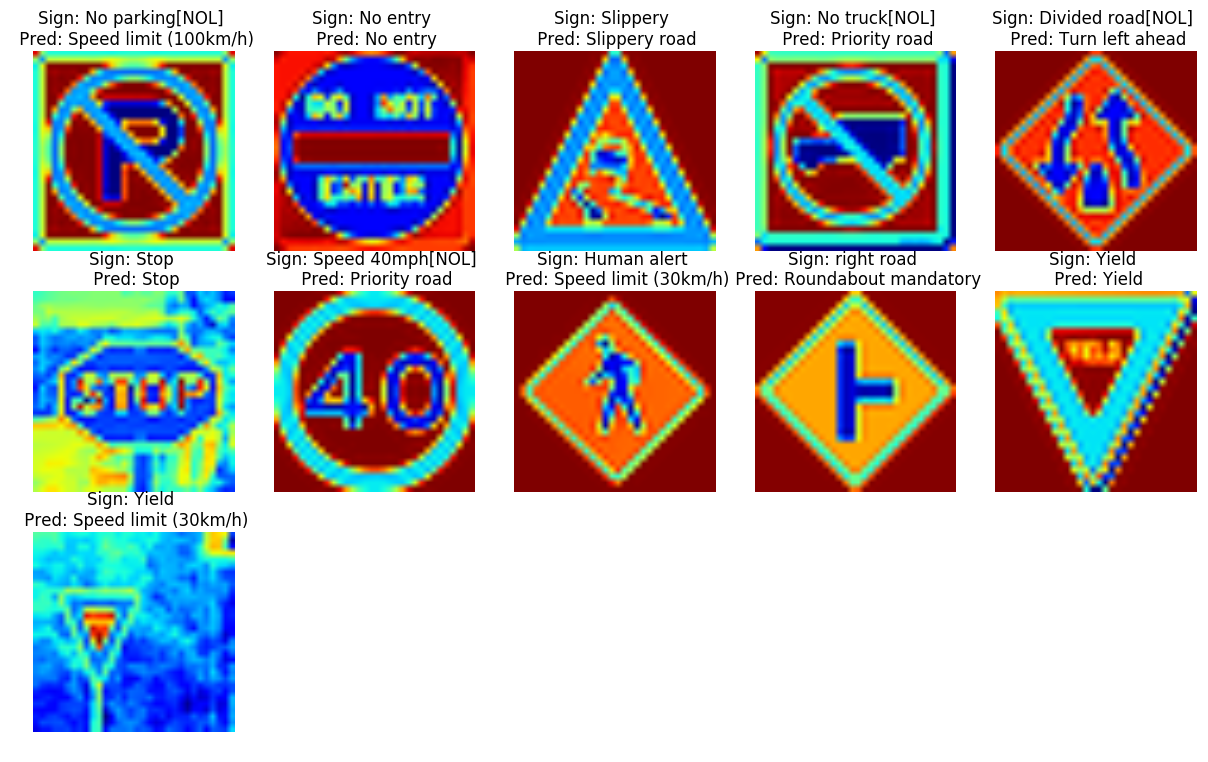

In [59]:
 img_test_3(origin[1:,:,:,0],test_title)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 

Some of reasons why couldn't the sign be recognized

- The Brightness of the image.
- The Contrast of the image.
- The Angle of the traffic sign.
- Image might be jittered.
- The training data set does not include this traffic sign.
- Testing foreign traffic sign.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 5 out of 11 signs correctly, it's 50% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** 
#### Train and validation accuracy is pretty high around 99.6% and 96.4% but Test accuracy 9.1%, which means only one image of 11 correctly recognized even though 4 of test images not on the traffic image list. 
#### 1/7 = 14%, still not very good classifier.


In [60]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [61]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
#   print(np.argmax(test_prediction.eval(), 1))
  top_5 = tf.nn.top_k(test_prediction.eval(), k = 5, sorted = True, name = None)
#   print(session.run(top_5))
  top5_list = session.run(top_5.indices)
  for name in top5_list:
    print(name)
    print([signname_map[conv] for conv in name])
#     for conv in name:
#         signname_map[conv]
#   print([signname_map[a] for a in np.argmax(test_prediction.eval(), 1)])

Initialized
[35  0  1  2  3]
['Ahead only', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[17  0  1  2  3]
['No entry', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[11  0  1  2  3]
['Right-of-way at the next intersection', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[12  0  1  2  3]
['Priority road', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[30 26  0  1  2]
['Beware of ice/snow', 'Traffic signals', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)']
[17  0  1  2  3]
['No entry', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[12  0  1  2  3]
['Priority road', 'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)']
[12 18  0  1  2]
['Priority road', 'General caution', 'Speed

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** answer just right above
Why couldn't recognize speed limit 40mph!!!!!! it is too distinct that is 40mph!!! 

---

**Update. I got it. speed limit 40mph not on the 43 traffic label!!! OMG**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.